In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from missing import plot_missing_percentage as pmp

In [57]:
ipayment = pd.read_csv('.././data/installments_payments.csv')

In [58]:
display(ipayment.sample(10))
print(f'\nInstallment Payment data shape:\n{ipayment.shape}')
print(f'\nInstallment Payment data info:')
print(ipayment.info())

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
7917888,2403894,388444,0.0,14,-2593.0,-2593.0,4500.000,4500.000
5377207,2228263,206230,1.0,5,-1272.0,-1284.0,3157.695,3157.695
3219346,2599868,158570,0.0,21,-2019.0,-2019.0,158.085,158.085
9165239,1697689,328354,1.0,1,-1858.0,-1872.0,8467.380,8467.380
4816237,1730157,254906,2.0,13,-421.0,-421.0,93033.000,93033.000
6250502,1180763,249741,1.0,9,-1244.0,-1272.0,5082.975,5082.975
9880339,2363713,309713,1.0,9,-400.0,-460.0,10980.270,10980.270
275211,2486961,196609,1.0,1,-567.0,-596.0,34928.640,143.280
11944978,1465993,452307,1.0,1,-1435.0,-1453.0,15000.885,15000.885
1166457,1256494,158955,1.0,7,-1480.0,-1511.0,9865.620,9865.620



Installment Payment data shape:
(13605401, 8)

Installment Payment data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


In [59]:
ipayment.duplicated().sum()

0

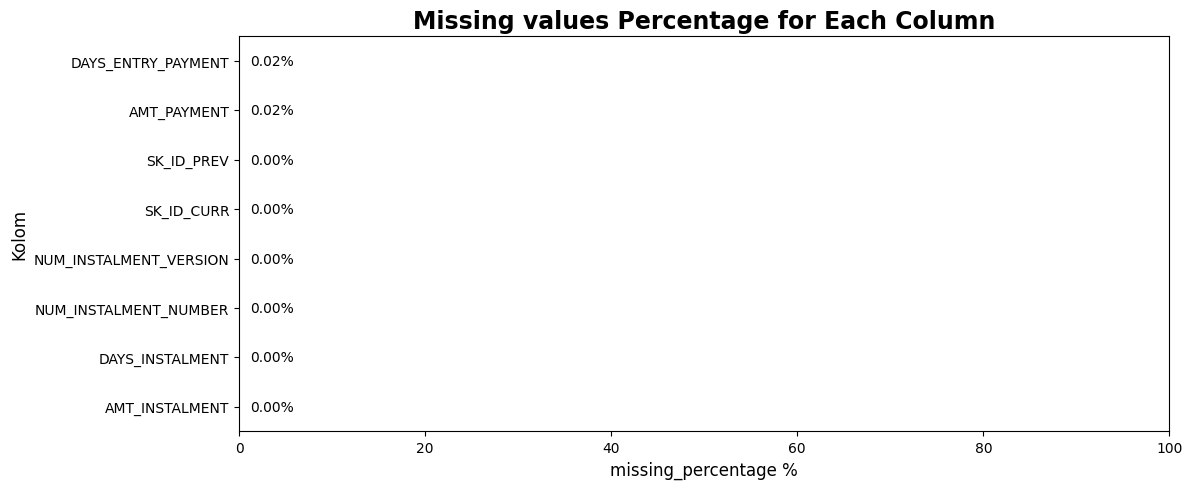

In [60]:
pmp(ipayment)

because the missing values only 0.02% of the data, i will drop the missing values.

In [63]:
ipayment_clean = ipayment.dropna()
ipayment_clean.to_csv('.././data/installments_payments_clean.csv', index=False)